In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

## read GPFS as pandas Dataframe    Memory Data

In [23]:
column_names = ["Inode (file unique ID)",
"KB Allocated",
"File Size",
"Creation Time in days from today",
"Change Time in days from today",
"Modification time in days from today",
"Acces time in days from today",
"GID numeric ID for the group owner of the file",
"UID numeric ID for the owner of the file"]
GPFS = pd.read_csv("/mnt/research/CMSE495-SS24-ICER/file_system_usage/gpfs-stats/inode-size-age-jan-23",header=None, names = column_names, sep=" ",nrows=1e7)
GPFS

,Inode (file unique ID),KB Allocated,File Size,Creation Time in days from today,Change Time in days from today,Modification time in days from today,Acces time in days from today,GID numeric ID for the group owner of the file,UID numeric ID for the owner of the file
0,100663296,0,8,1447,1447,3131,1447,2035,762231
1,100663297,0,188,1447,1447,1937,1447,2010,614955
2,100663301,0,567,1447,1447,3142,1447,2035,762231
3,100663304,0,87,1447,1447,3142,1447,2035,762231
4,100663306,0,1689,1447,1447,1937,1447,2010,614955
...,...,...,...,...,...,...,...,...,...
9999995,124522107,64,5739,15,15,146,2,2005,6052828
9999996,124522107,64,5739,15,15,146,2,2005,6052828
9999997,124522108,0,1051,15,15,161,15,2005,6052828
9999998,124522108,0,1051,15,15,161,15,2005,6052828


In [24]:
GPFS.nunique()

Inode (file unique ID)                            9283343
KB Allocated                                         3907
File Size                                          528762
Creation Time in days from today                     1172
Change Time in days from today                       1176
Modification time in days from today                 6995
Acces time in days from today                        1259
GID numeric ID for the group owner of the file         40
UID numeric ID for the owner of the file               52
dtype: int64

# Compute file size-  kb allocated = allocated memory not used
# The higher the # the higher allocated memory not used

In [25]:
# compute file size-  kb allocated = allocated memory not used
# the higher the # the higher allocated memory not used

# file size is in bytes, KB Allocated is in Kilo Bytes
GPFS["underutilizerBytes"] = GPFS['File Size'] - (GPFS['KB Allocated'] + 3000)/1000
GPFS

,Inode (file unique ID),KB Allocated,File Size,Creation Time in days from today,Change Time in days from today,Modification time in days from today,Acces time in days from today,GID numeric ID for the group owner of the file,UID numeric ID for the owner of the file,underutilizerBytes
0,100663296,0,8,1447,1447,3131,1447,2035,762231,5.000
1,100663297,0,188,1447,1447,1937,1447,2010,614955,185.000
2,100663301,0,567,1447,1447,3142,1447,2035,762231,564.000
3,100663304,0,87,1447,1447,3142,1447,2035,762231,84.000
4,100663306,0,1689,1447,1447,1937,1447,2010,614955,1686.000
...,...,...,...,...,...,...,...,...,...,...
9999995,124522107,64,5739,15,15,146,2,2005,6052828,5735.936
9999996,124522107,64,5739,15,15,146,2,2005,6052828,5735.936
9999997,124522108,0,1051,15,15,161,15,2005,6052828,1048.000
9999998,124522108,0,1051,15,15,161,15,2005,6052828,1048.000


In [26]:
# identify users that underutilize memory going off file size and kb allocation
# not sure of number??????????
GPFS[GPFS.underutilizerBytes>2000000].head()

,Inode (file unique ID),KB Allocated,File Size,Creation Time in days from today,Change Time in days from today,Modification time in days from today,Acces time in days from today,GID numeric ID for the group owner of the file,UID numeric ID for the owner of the file,underutilizerBytes
5,100663307,8192,11469504,1447,1447,2518,1447,2069,1000000092,1.146949e+07
9,100663315,448,2006143,1447,1447,3142,1447,2035,762231,2.006140e+06
19,100663340,2240,6001928,1447,1447,1540,1447,2003,785573,6.001923e+06
36,100663371,8192,16708680,1447,1447,1540,1447,2003,785573,1.670867e+07
57,100663409,2752,4543957,1447,1447,1904,1447,2010,841154,4.543951e+06


In [27]:
# standard dataframe
GPFS.underutilizerBytes.describe()

count    1.000000e+07
mean     1.088770e+06
std      1.207585e+08
min     -3.000000e+00
25%      6.170000e+02
50%      2.938000e+03
75%      1.642994e+04
max      2.197475e+11
Name: underutilizerBytes, dtype: float64

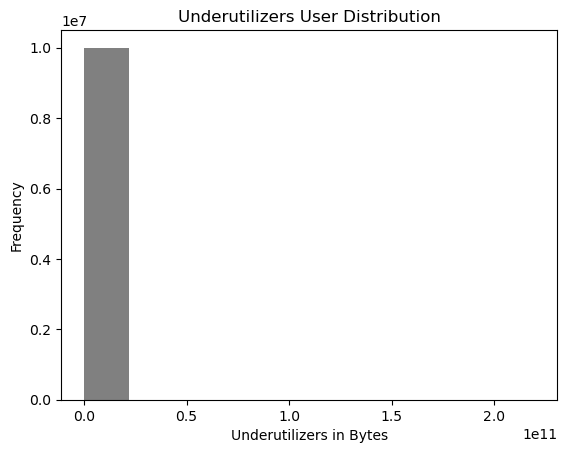

In [28]:
# filtering to only outliers for KB allocated underutilized (bad_users)
plt.hist(GPFS.underutilizerBytes,  bins=10, color="grey")
plt.xlabel("Underutilizers in Bytes")
plt.ylabel("Frequency")
plt.title("Underutilizers User Distribution")
plt.show()

In [29]:
# removing outliers
# IQR method
Q1 = GPFS['underutilizerBytes'].quantile(0.25)
Q3 = GPFS['underutilizerBytes'].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = GPFS[(GPFS['underutilizerBytes'] >= (Q1 - 1.5 * IQR)) & 
                    (GPFS['underutilizerBytes'] <= (Q3 + 1.5 * IQR))]
# dataframe with out outliers
df_no_outliers.head()

,Inode (file unique ID),KB Allocated,File Size,Creation Time in days from today,Change Time in days from today,Modification time in days from today,Acces time in days from today,GID numeric ID for the group owner of the file,UID numeric ID for the owner of the file,underutilizerBytes
0,100663296,0,8,1447,1447,3131,1447,2035,762231,5.0
1,100663297,0,188,1447,1447,1937,1447,2010,614955,185.0
2,100663301,0,567,1447,1447,3142,1447,2035,762231,564.0
3,100663304,0,87,1447,1447,3142,1447,2035,762231,84.0
4,100663306,0,1689,1447,1447,1937,1447,2010,614955,1686.0


In [30]:
# no outliers dataframe
df_no_outliers.underutilizerBytes.describe()

count    8.283298e+06
mean     5.239010e+03
std      7.832271e+03
min     -3.000000e+00
25%      5.300000e+02
50%      2.011000e+03
75%      6.354936e+03
max      4.014894e+04
Name: underutilizerBytes, dtype: float64

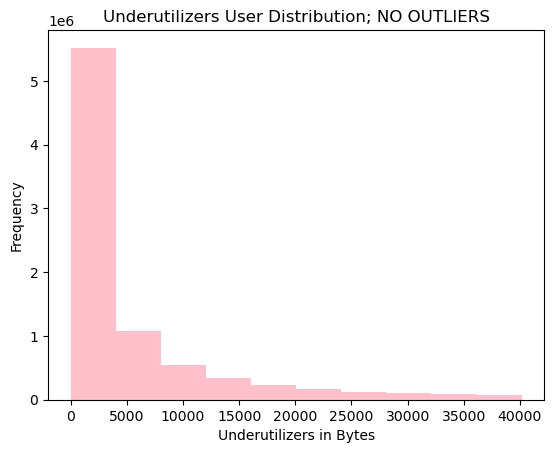

In [31]:
# filtering to only outliers for KB allocated underutilized (bad_users)
plt.hist(df_no_outliers.underutilizerBytes,  bins=10, color='pink')
plt.xlabel("Underutilizers in Bytes")
plt.ylabel("Frequency")
plt.title("Underutilizers User Distribution; NO OUTLIERS")
plt.show()

In [32]:
# ISolate users that dont use the data they requested via KB allocation 
#  df['DataUsedKB'] < df['DataAllocatedKB'] creates a boolean mask where each row is True if 
#  the user used less data than allocated and False

GPFS["UsedLessThanAllocated"]= GPFS['File Size'] < (GPFS['KB Allocated']+3000)/1000
GPFS.head()

,Inode (file unique ID),KB Allocated,File Size,Creation Time in days from today,Change Time in days from today,Modification time in days from today,Acces time in days from today,GID numeric ID for the group owner of the file,UID numeric ID for the owner of the file,underutilizerBytes,UsedLessThanAllocated
0,100663296,0,8,1447,1447,3131,1447,2035,762231,5.0,False
1,100663297,0,188,1447,1447,1937,1447,2010,614955,185.0,False
2,100663301,0,567,1447,1447,3142,1447,2035,762231,564.0,False
3,100663304,0,87,1447,1447,3142,1447,2035,762231,84.0,False
4,100663306,0,1689,1447,1447,1937,1447,2010,614955,1686.0,False


In [33]:
# number of users that underutilize the KB they allocate = True
print(GPFS['UsedLessThanAllocated'].value_counts())


False    9730611
True      269389
Name: UsedLessThanAllocated, dtype: int64


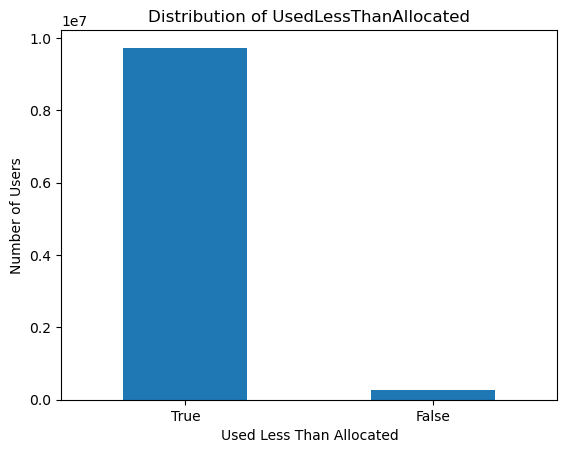

In [34]:
# who underuzilizes the most
# Count the occurrences of True and False in the 'UsedLessThanAllocated' column
value_counts = GPFS['UsedLessThanAllocated'].value_counts()

# Create a bar plot
value_counts.plot(kind='bar')

# Set the title and labels
plt.title('Distribution of UsedLessThanAllocated')
plt.xlabel('Used Less Than Allocated')
plt.ylabel('Number of Users')
plt.xticks(ticks=[0, 1], labels=['True', 'False'], rotation=0)  # Set the x-ticks to correspond to False and True

# Show the plot
plt.show()

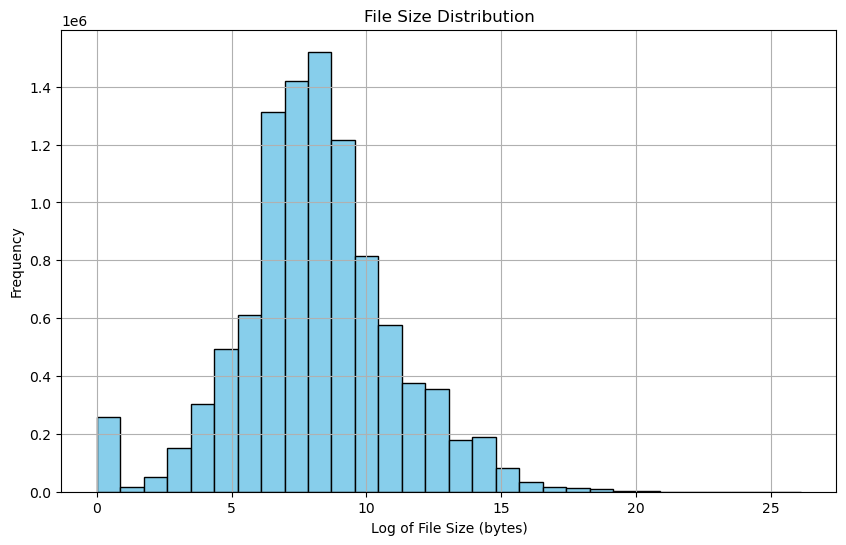

In [35]:
# Applying log transformation
GPFS['log_file_size'] = GPFS['File Size'].apply(lambda x: np.log1p(x))

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['log_file_size'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Log of File Size (bytes)')
plt.ylabel('Frequency')
plt.title('File Size Distribution')
plt.grid(True)
plt.show()

## Identified users with many files

**Just using 10,000,000 rows in GPFS (type pandas)**


In [36]:
# Count the number of files for each user  ****************
file_count_per_user = GPFS.groupby("UID numeric ID for the owner of the file").size()

# Display the result
file_countperUID= file_count_per_user[file_count_per_user.sort_values()>1000]
file_countperUID

UID numeric ID for the owner of the file
0               1039
500120        655392
614955        677944
638741        835389
697349        305850
753559        383946
758827        264003
762231        856363
785573        776204
799192         21128
831677        366721
834474         50287
839641        922130
841154        526494
862983        303210
875212         84531
876249        315345
881083        915468
1028735        21466
1040196       503224
1040612       182603
6052828       352409
1000000088    195906
1000000092    481751
dtype: int64

In [37]:
# identify users with many files
def UsersWithManyFiles(data, file_limit):
    '''
    Function to identify users with many files using a file limit as a number integer of the limit of number of
    files per user.
    :param data: dataset containing columns related to user: Inode (file unique ID)	KB Allocated	File Size	Creation Time in days from today	Change Time in days from today	Modification time in days from today	Acces time in days from today	GID numeric ID for the group owner of the file	UID numeric ID for the owner of the file
    :param file_limit: integer resembling the file limit per user
    return users that are have a greater number of total files than the file limit
    '''
    file_count_perUser = data.groupby("UID numeric ID for the owner of the file").size()
    print(file_count_per_user[file_count_per_user.sort_values()>file_limit])
    
# test
UsersWithManyFiles(GPFS,1000)

UID numeric ID for the owner of the file
0               1039
500120        655392
614955        677944
638741        835389
697349        305850
753559        383946
758827        264003
762231        856363
785573        776204
799192         21128
831677        366721
834474         50287
839641        922130
841154        526494
862983        303210
875212         84531
876249        315345
881083        915468
1028735        21466
1040196       503224
1040612       182603
6052828       352409
1000000088    195906
1000000092    481751
dtype: int64


Number of unique UIDs for 10 million rows of GPFS data 52


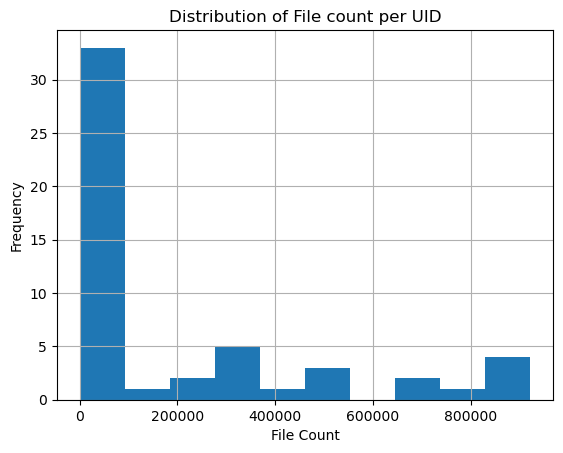

In [38]:
# count the number of files for each user using UID numeric ID for the owner of the file
file_count_per_user= GPFS["UID numeric ID for the owner of the file"].value_counts()
print("Number of unique UIDs for 10 million rows of GPFS data",len(file_count_per_user))


file_count_per_user.hist()
plt.title("Distribution of File count per UID")
plt.xlabel("File Count")
plt.ylabel("Frequency")
plt.show()

## Read GPFS as a dask dataframe, sample, convert to pandas

In [2]:
import dask.dataframe as dd
ddf = dd.read_csv("/mnt/research/CMSE495-SS24-ICER/file_system_usage/gpfs-stats/inode-size-age-jan-23",header=None, names = column_names, sep=" ")


In [3]:
ddf.head()

,Inode (file unique ID),KB Allocated,File Size,Creation Time in days from today,Change Time in days from today,Modification time in days from today,Acces time in days from today,GID numeric ID for the group owner of the file,UID numeric ID for the owner of the file
0,100663296,0,8,1447,1447,3131,1447,2035,762231
1,100663297,0,188,1447,1447,1937,1447,2010,614955
2,100663301,0,567,1447,1447,3142,1447,2035,762231
3,100663304,0,87,1447,1447,3142,1447,2035,762231
4,100663306,0,1689,1447,1447,1937,1447,2010,614955


In [8]:
# Get basic information (like `df.info()` in pandas)
ddf.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 9 entries, Inode (file unique ID) to UID numeric ID for the owner of the file
dtypes: int64(9)

In [9]:
# Compute and display the number of rows and columns
print(ddf.shape[0].compute(), ddf.shape[1])

# Display the data types of each column
print(ddf.dtypes)

1471070449 9
Inode (file unique ID)                            int64
KB Allocated                                      int64
File Size                                         int64
Creation Time in days from today                  int64
Change Time in days from today                    int64
Modification time in days from today              int64
Acces time in days from today                     int64
GID numeric ID for the group owner of the file    int64
UID numeric ID for the owner of the file          int64
dtype: object


In [10]:
# Compute summary statistics (like `df.describe()` in pandas)
# takes some time to run
print(ddf.describe().compute())

       Inode (file unique ID)  KB Allocated     File Size  \
count            1.471070e+09  1.471070e+09  1.471070e+09   
mean            -2.383569e+09  1.782180e+03  2.305633e+06   
std              4.523743e+10  2.090758e+05  3.251601e+08   
min              3.355443e+07  0.000000e+00  0.000000e+00   
25%              1.747511e+09  0.000000e+00  1.717000e+03   
50%              3.208757e+09  6.400000e+01  9.461000e+03   
75%              2.025256e+10  4.928000e+03  6.126199e+06   
max              1.236967e+12  1.925000e+09  2.177450e+12   

       Creation Time in days from today  Change Time in days from today  \
count                      1.471070e+09                    1.471070e+09   
mean                       8.845334e+02                    8.426968e+02   
std                        4.393630e+02                    4.400356e+02   
min                        0.000000e+00                    0.000000e+00   
25%                        7.500000e+02                    6.980000e+02   


In [12]:
# Count missing values in each column; takes time to run
ddf.isnull().sum().compute()

Inode (file unique ID)                            0
KB Allocated                                      0
File Size                                         0
Creation Time in days from today                  0
Change Time in days from today                    0
Modification time in days from today              0
Acces time in days from today                     0
GID numeric ID for the group owner of the file    0
UID numeric ID for the owner of the file          0
dtype: int64

## Sampling dask dataframe, convert to pandas, make the first1000 rows a pandas dataframe

In [13]:
# Sample approximately 10% of the rows without replacement
approx_total_rows = 14e6  # Approximate total number of rows in ddf
desired_sample_size = 100
frac = desired_sample_size / approx_total_rows

sampled_ddf = ddf.sample(frac=frac, replace=False)

In [14]:
# TAKES TIME TO CONVERT
# To compute and get the sampled data as a pandas dataframe (be cautious with memory usage)
sampled_pdf = sampled_ddf.compute()
sampled_pdf

,Inode (file unique ID),KB Allocated,File Size,Creation Time in days from today,Change Time in days from today,Modification time in days from today,Acces time in days from today,GID numeric ID for the group owner of the file,UID numeric ID for the owner of the file
666561,101461254,64,6170,1447,1447,1999,1447,2010,839641
729320,101531980,64,12854,1447,1447,3212,1447,2035,762231
939914,101786198,64,6350,1447,1447,1999,1447,2010,839641
687695,101484694,64,10847,1447,1447,1999,1447,2010,839641
1093087,101981708,64,10187,1447,1447,1999,1446,2010,839641
...,...,...,...,...,...,...,...,...,...
1229533,227756024747,0,1323,839,839,1708,468,2008,804448
716763,227755279763,128,69536,839,839,2865,469,2008,804448
1097267,227755838152,0,2380,839,839,1422,468,2584,920022
1037949,227755751603,0,1743,839,839,1823,469,2008,804448


In [22]:
# SMALLER pandas dataset;;;; veryyyy helpful!!
GPFS_pds= sampled_pdf.head(1000)
GPFS_pds.head(2)

,Inode (file unique ID),KB Allocated,File Size,Creation Time in days from today,Change Time in days from today,Modification time in days from today,Acces time in days from today,GID numeric ID for the group owner of the file,UID numeric ID for the owner of the file
666561,101461254,64,6170,1447,1447,1999,1447,2010,839641
729320,101531980,64,12854,1447,1447,3212,1447,2035,762231


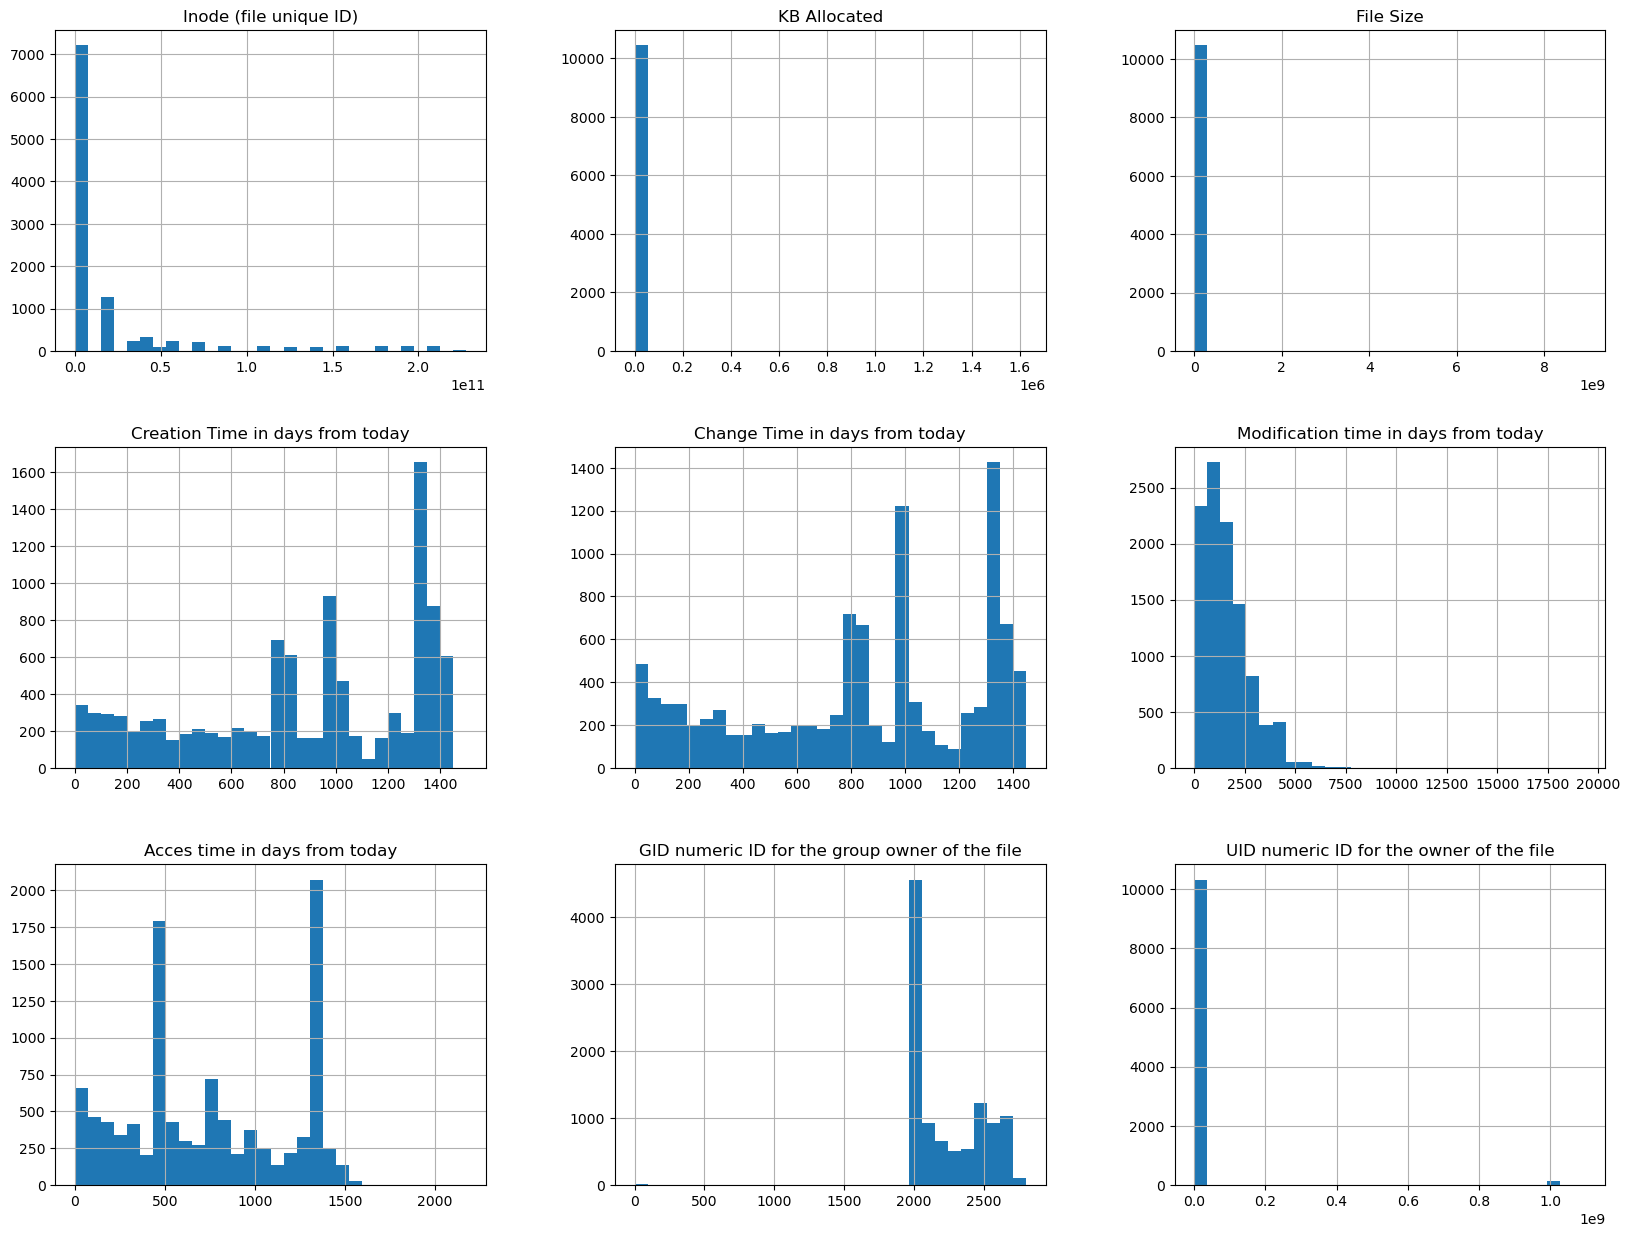

In [48]:
# histogram for each feature in the dataset
sampled_pdf.hist(bins=30, figsize=(20, 15))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

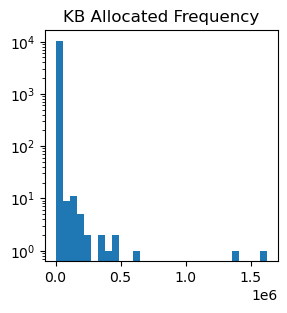

In [46]:
plt.figure(figsize=(3,3))
plt.hist(sampled_pdf["KB Allocated"], bins=30, log=True)
plt.title("KB Allocated Frequency")
plt.show